In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Training dataset

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y\r\n

In [ ]:
#loading train dataset
df_train=pd.read_csv('train.csv')

In [ ]:
#loading test dataset
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#EDA on Training Dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_train.shape

(614, 13)

number of rows=614

number of columns =13

#Missing Values checking

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###null values are present in the dataset in columns 
1.Gender              - 13(object dtype)

2.Married             -  3(object dtype)

3.Dependents           -15(object dtype)

4.Self_Employed       - 32(object dtype)

5.LoanAmount          - 22(float dtype)

6.Loan_Amount_Term     -14(float dtype)

7.Credit_History       -50(float dtype)


In [ ]:
df_train[df_train.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


#Missing values handling in Training dataset

###1.For numerical varible columns: imputation using mean or median(depending on distribution of the independent variable).

###2.For categorical variable columns: imputation using mode.

#Checking the distribution of LoanAmount , Loan_Amount_Term,   Credit_History       

Text(0.5, 0, 'Credit History')

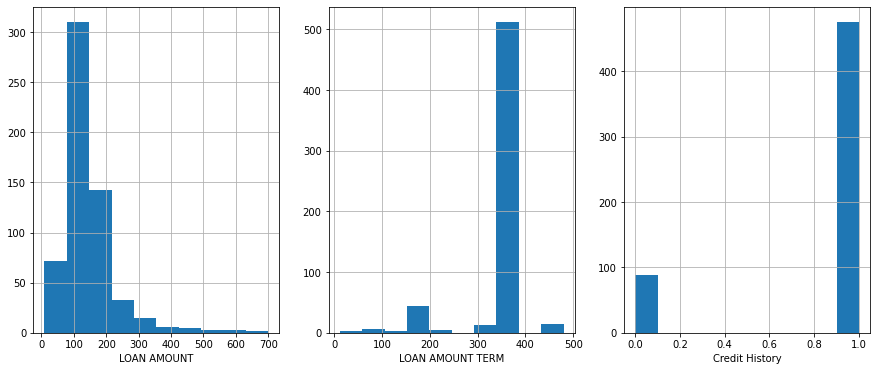

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_train['LoanAmount'].hist()
plt.xlabel('LOAN AMOUNT')

plt.subplot(1,3,2)
df_train['Loan_Amount_Term'].hist()
plt.xlabel('LOAN AMOUNT TERM')

plt.subplot(1,3,3)
df_train['Credit_History'].hist()
plt.xlabel('Credit History')

###From the above plotted graphs we can infer that all the distributions are skewed so median can be used to fill the   missing values

In [ ]:
print(df_train['LoanAmount'].mean())
print(df_train['LoanAmount'].median())
print(df_train['LoanAmount'].mode()[0])

146.41216216216216
128.0
120.0


In [ ]:
print(df_train['Loan_Amount_Term'].mean())
print(df_train['Loan_Amount_Term'].median())
print(df_train['Loan_Amount_Term'].mode()[0])

342.0
360.0
360.0


In [ ]:
print(df_train['Credit_History'].mean())
print(df_train['Credit_History'].median())
print(df_train['Credit_History'].mode()[0])

0.8421985815602837
1.0
1.0


In [ ]:
#filling missing values in numerical varible columns
d1=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in d1:
  df_train[i]=df_train[i].fillna(df_train[i].median())

In [ ]:
#filling missing values in categorical varible columns
d2=['Gender', 'Married', 'Dependents',
       'Self_Employed',]
for i in d2:
  df_train[i]=df_train[i].fillna(df_train[i].mode()[0])
  

In [ ]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Outlier Checking using Boxplot

In [ ]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

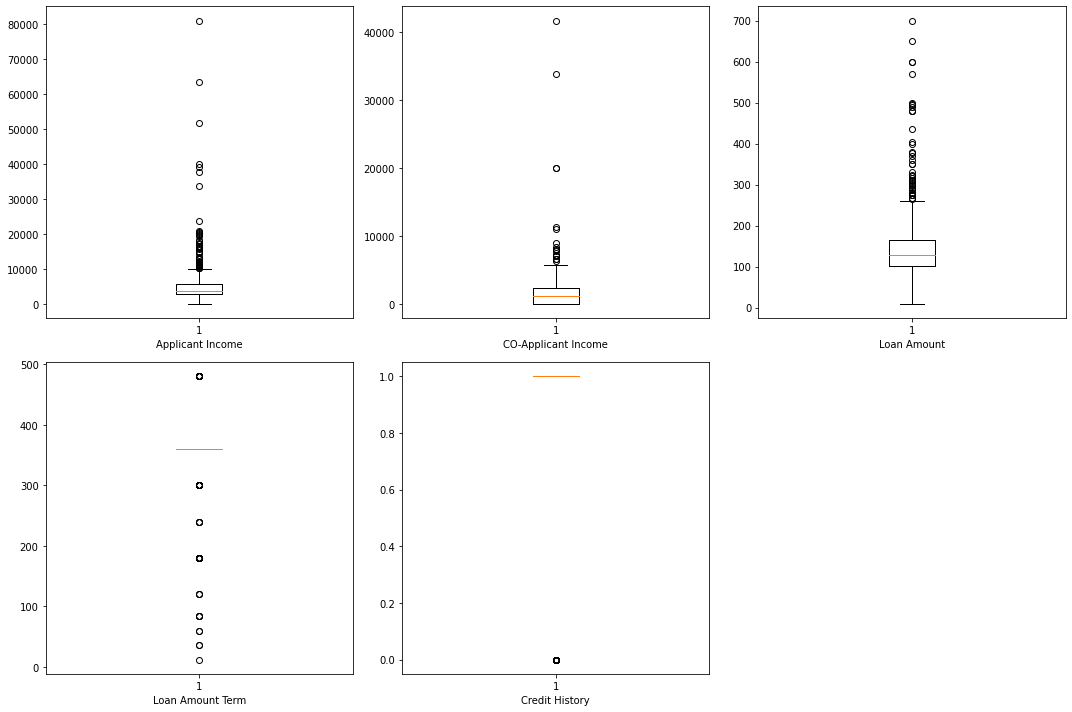

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.boxplot(df_train['ApplicantIncome'])
plt.xlabel('Applicant Income')

plt.subplot(2,3,2)
plt.boxplot(df_train['CoapplicantIncome'])
plt.xlabel('CO-Applicant Income')

plt.subplot(2,3,3)
plt.boxplot(df_train['LoanAmount'])
plt.xlabel('Loan Amount')

plt.subplot(2,3,4)
plt.boxplot(df_train['Loan_Amount_Term'])
plt.xlabel('Loan Amount Term')

plt.subplot(2,3,5)
plt.boxplot(df_train['Credit_History'])
plt.xlabel('Credit History')

plt.tight_layout()

###There are outliers present in Applicant Income,   Coapplicant Income, Loan Amount, Loan Amount Term, Credit History columns.    

#checking for unique values

In [ ]:
df_train['ApplicantIncome'].nunique()

505

In [ ]:
df_train['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
df_train['CoapplicantIncome'].nunique()

287

In [ ]:
df_train['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [ ]:
df_train['LoanAmount'].nunique()

203

In [ ]:
df_train['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [ ]:
df_train['Loan_Amount_Term'].nunique()

10

In [ ]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df_train['Credit_History'].nunique()

2

In [ ]:
df_train['Credit_History'].unique()

array([1., 0.])

#1.Count Plot

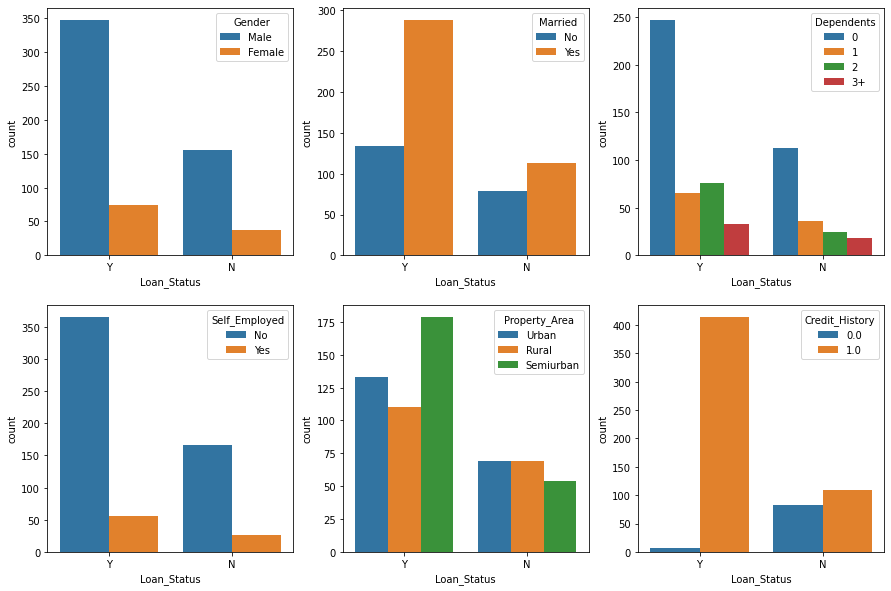

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Gender'])

plt.subplot(2,3,2)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Married'])

plt.subplot(2,3,3)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Dependents'])

plt.subplot(2,3,4)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Property_Area'])

plt.subplot(2,3,6)
sns.countplot(data=df_train,x=df_train['Loan_Status'],hue=df_train['Credit_History'])

#2.Pair Plot

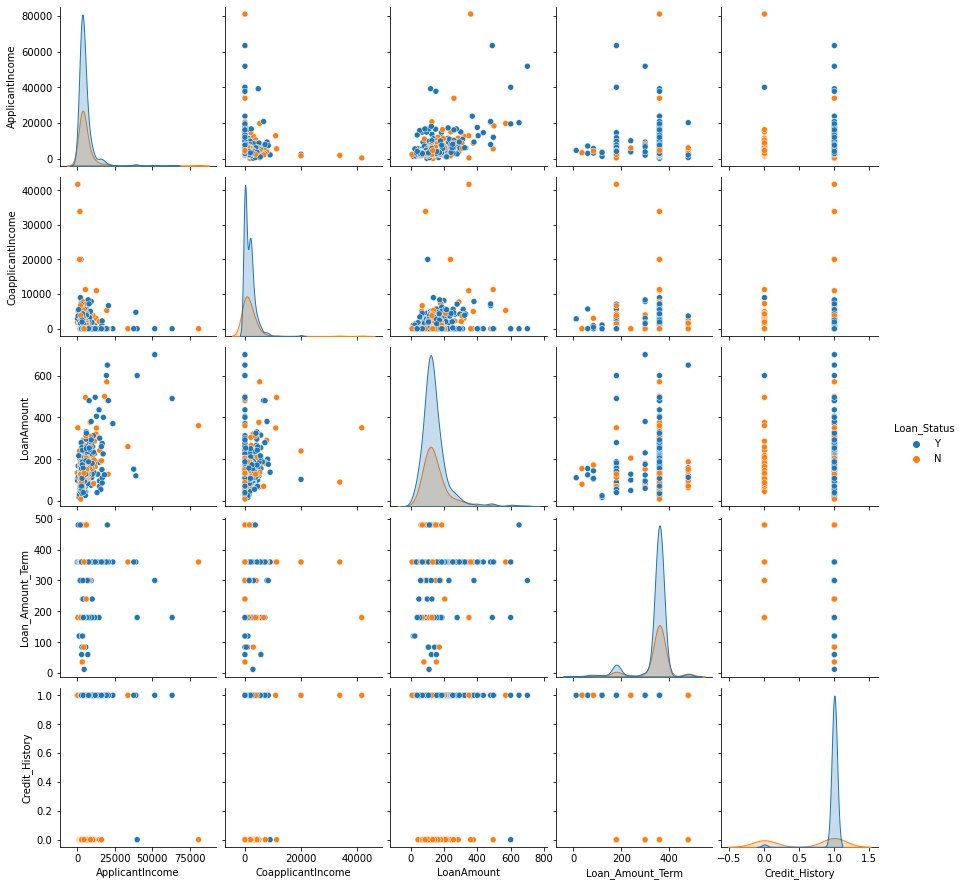

In [ ]:
sns.pairplot(df_train,hue='Loan_Status')

#Checking for multicolinearity

In [ ]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_train1=df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [ ]:
corr_matrix=df_train1.corr()


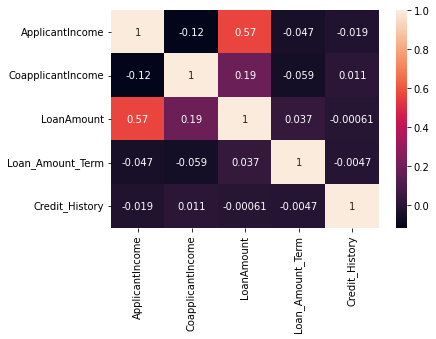

In [ ]:
sns.heatmap(corr_matrix,annot=True)

#MinMax Scaling

In [ ]:
x=df_train.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status'],axis=1)

In [ ]:
z=df_train[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
minmax= MinMaxScaler(feature_range=(0,1))
x1=minmax.fit_transform(x)

In [ ]:
df_train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#x1 is in array form converting back to DataFrame
x1=pd.DataFrame(x1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [ ]:
x1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005,0.855049
std,0.075560,0.070229,0.121718,0.137668,0.352339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590,1.000000
50%,0.045300,0.028524,0.172214,0.743590,1.000000
75%,0.069821,0.055134,0.225398,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=pd.concat([x1,z],axis=1)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.070489,0.000000,0.172214,0.74359,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,0.054830,0.036192,0.172214,0.74359,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,0.035250,0.000000,0.082489,0.74359,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,0.030093,0.056592,0.160637,0.74359,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,0.072356,0.000000,0.191027,0.74359,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
df.drop('Loan_ID',inplace=True,axis=1)

#Encoding

In [ ]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
df['Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
df['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace = True)
    
    

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,1,0,Urban,Y
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,1,0,Rural,N
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,1,1,Urban,Y
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,Urban,Y
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,1,0,Urban,Y


In [ ]:
 df = df.join(pd.get_dummies(df.Dependents,prefix='Dependents'))
 df = df.join(pd.get_dummies(df.Property_Area, prefix='Property_Area'))

In [ ]:
df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,1,0,Y,1,0,0,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,N,0,1,0,0,1,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,1,1,Y,1,0,0,0,0,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,Y,1,0,0,0,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,1,0,Y,1,0,0,0,0,0,1


#Since the Target variable is categorical Classification algorithms can be used for prediction 

#Model building on MinMax Scaled training data

#1.Logistic Regression Model

In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model_logistic=clf.fit(x_train,y_train)
y_pred_log_mimmax=model_logistic.predict(x_test)

In [ ]:
#classification model validation check
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_log_mimmax))#model validation checking using confusion matrix

Confusion Matrix: 
  [[21 33]
 [ 2 98]]


In [ ]:
print('The Accuracy of Logistic Regression Model(on minmax scaled data) is:',np.round(accuracy_score(y_test,y_pred_log_mimmax)*100,2),'%')#model validation checking using accuracy score


The Accuracy of Logistic Regression Model(on minmax scaled data) is: 77.27 %


#2.KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k=[]
neighbors=np.arange(3,14)

In [ ]:
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model_knn=knn.fit(x_train,y_train)
  y_pred_knn_minmax=model_knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn_minmax)
  metric_k.append(acc)

In [ ]:
metric_k

[0.6818181818181818,
 0.6818181818181818,
 0.7012987012987013,
 0.6558441558441559,
 0.7207792207792207,
 0.6948051948051948,
 0.7077922077922078,
 0.7142857142857143,
 0.7272727272727273,
 0.7207792207792207,
 0.7077922077922078]

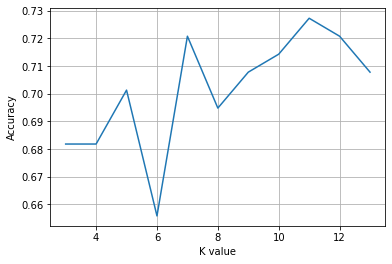

In [ ]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(neighbors,metric_k)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
model_knn=knn.fit(x_train,y_train)
y_pred_knn_minmax=model_knn.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_knn_minmax))

Confusion Matrix: 
  [[ 12  42]
 [  0 100]]


In [ ]:
print('The Accuracy of KNN Model(on minmax scaled data) is:',np.round(accuracy_score(y_test,y_pred_knn_minmax)*100,2),'%')


The Accuracy of KNN Model(on minmax scaled data) is: 72.73 %


#3.SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf=SVC(kernel='rbf')
model_svm=svm_clf.fit(x_train,y_train)
y_pred_svm_minmax=model_svm.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_svm_minmax))

Confusion Matrix: 
  [[21 33]
 [ 2 98]]


In [ ]:
print('The Accuracy of SVM Model(kernel=rbf)(on minmax scaled data) is:',np.round(accuracy_score(y_test,y_pred_svm_minmax)*100,2),'%')


The Accuracy of SVM Model(kernel=rbf)(on minmax scaled data) is: 77.27 %


#4.Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_deci_minmax=dt_model.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_deci_minmax))

Confusion Matrix: 
  [[23 31]
 [23 77]]


In [ ]:
print('The Accuracy of Decision Tree Model(on minmax scaled data) is:',np.round(accuracy_score(y_test,y_pred_deci_minmax)*100,2),'%')


The Accuracy of Decision Tree Model(on minmax scaled data) is: 64.94 %


#5.Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf= RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rand_minmax=rf_model.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_rand_minmax))

Confusion Matrix: 
  [[24 30]
 [ 6 94]]


In [ ]:
print('The Accuracy of Random Forest Model (on min max scaled data) is:',np.round(accuracy_score(y_test,y_pred_rand_minmax)*100,2),'%')

The Accuracy of Random Forest Model (on min max scaled data) is: 76.62 %


#Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
xs=df_train.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status'],axis=1)


In [ ]:
zs=df_train[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']]
       

In [ ]:
std= StandardScaler()
xs1=std.fit_transform(xs)

In [ ]:
#x1 is in array form converting back to DataFrame
xs1=pd.DataFrame(xs1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [ ]:
xs1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00
25%,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01
50%,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01
75%,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01
max,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01


In [ ]:
dfs=pd.concat([xs1,zs],axis=1)

In [ ]:
dfs.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,LP001002,Male,No,0,Graduate,No,Urban,Y
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
dfs.drop('Loan_ID',inplace=True,axis=1)

#Encoding

In [ ]:
dfs['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
dfs['Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
dfs['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
dfs['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace = True)
    
    

In [ ]:
dfs.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,0,0,1,0,Urban,Y
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,1,1,1,1,0,Rural,N
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,1,0,1,1,Urban,Y
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,1,0,0,0,Urban,Y
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,0,0,1,0,Urban,Y


In [ ]:
 dfs = dfs.join(pd.get_dummies(dfs.Dependents,prefix='Dependents'))
 dfs = dfs.join(pd.get_dummies(dfs.Property_Area, prefix='Property_Area'))

In [ ]:
dfs.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
dfs.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,0,1,0,Y,1,0,0,0,0,0,1
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,1,1,1,0,N,0,1,0,0,1,0,0
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,1,1,1,Y,1,0,0,0,0,0,1
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,1,0,0,Y,1,0,0,0,0,0,1
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,0,1,0,Y,1,0,0,0,0,0,1


#Model building on Standard Scaled Training Data

#1.Logistic Regression Model

In [ ]:
x=dfs.drop('Loan_Status',axis=1)
y=dfs['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model_logistic1=clf.fit(x_train,y_train)
y_pred_logistic_std=model_logistic1.predict(x_test)

In [ ]:
#classification model validation check
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_logistic_std))#model validation checking using confusion matrix

Confusion Matrix: 
  [[21 33]
 [ 2 98]]


In [ ]:
print('The Accuracy of Logistic Regression Model(on standard scaled data) is:',np.round(accuracy_score(y_test,y_pred_logistic_std)*100,2),'%')#model validation checking using accuracy score

The Accuracy of Logistic Regression Model(on standard scaled data) is: 77.27 %


#2.KNN Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,20)
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model_knn1=knn.fit(x_train,y_train)
  y_pred_knn_std=model_knn1.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn_std)
  metric_k.append(acc)

In [ ]:
metric_k

[0.7532467532467533,
 0.6948051948051948,
 0.7727272727272727,
 0.7402597402597403,
 0.7792207792207793,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793]

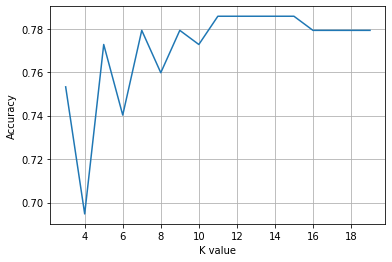

In [ ]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(neighbors,metric_k)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12)
model_knn1=knn.fit(x_train,y_train)
y_pred_knn_std=model_knn1.predict(x_test)

In [ ]:
print('The Accuracy of KNN Model(on standard scaled data) is:',np.round(accuracy_score(y_test,y_pred_knn_std)*100,2),'%')


The Accuracy of KNN Model(on standard scaled data) is: 78.57 %


#3.SVM

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
model_svm1=svm_clf.fit(x_train,y_train)
y_pred_svm_std=model_svm1.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_svm_std))

Confusion Matrix: 
  [[22 32]
 [ 1 99]]


In [ ]:
print('The Accuracy of SVM Model(kernel=rbf)(on standard scaled data) is:',np.round(accuracy_score(y_test,y_pred_svm_std)*100,2),'%')


The Accuracy of SVM Model(kernel=rbf)(on standard scaled data) is: 78.57 %


#4.Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt1_model=dt_clf.fit(x_train,y_train)
y_pred_deci_std=dt1_model.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_deci_std))

Confusion Matrix: 
  [[23 31]
 [23 77]]


In [ ]:
print('The Accuracy of Decision Tree Model(on standard scaled data) is:',np.round(accuracy_score(y_test,y_pred_deci_std)*100,2),'%')


The Accuracy of Decision Tree Model(on standard scaled data) is: 64.94 %


#5.Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=42)
rf1_model=rf_clf.fit(x_train,y_train)
y_pred_rand_std=rf1_model.predict(x_test)

In [ ]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_rand_std))

Confusion Matrix: 
  [[24 30]
 [ 6 94]]


In [ ]:
print('The Accuracy of Random Forest Model(on standard scaled data) is:',np.round(accuracy_score(y_test,y_pred_rand_std)*100,2),'%')

The Accuracy of Random Forest Model(on standard scaled data) is: 76.62 %


#Testing dataset

In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2,Graduate,,12173

In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#EDA on Testing Dataset

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_test.shape

(367, 12)

number of rows=367

number of columns =12

In [ ]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

###null values are present in the dataset in columns 
1.Gender              - 11(object dtype)


2.Dependents           -10(object dtype)

3.Self_Employed       - 23(object dtype)

4.LoanAmount          - 5(float dtype)

5.Loan_Amount_Term     -6(float dtype)

6.Credit_History       -29(float dtype)


In [ ]:
df_test[df_test.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,NaN,Urban
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban


#Missing values handling in Testing dataset

###1.For numerical varible columns: imputation using mean or median(depending on distribution of the independent variable).

###2.For categorical variable columns: imputation using mode.

#Checking the distribution of LoanAmount , Loan_Amount_Term,   Credit_History       

Text(0.5, 0, 'Credit History')

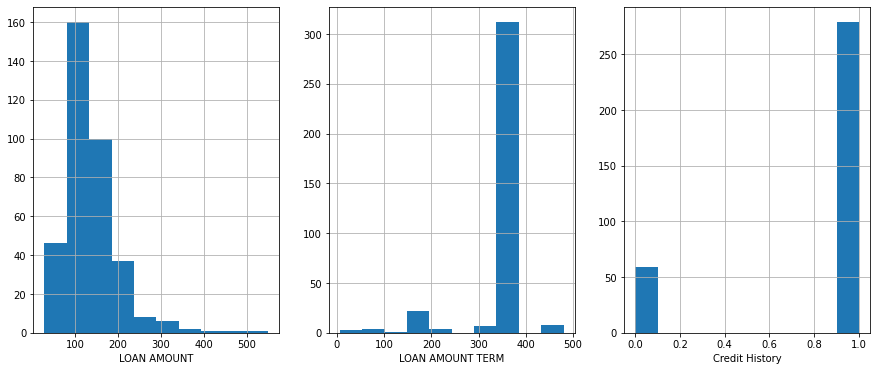

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_test['LoanAmount'].hist()
plt.xlabel('LOAN AMOUNT')

plt.subplot(1,3,2)
df_test['Loan_Amount_Term'].hist()
plt.xlabel('LOAN AMOUNT TERM')

plt.subplot(1,3,3)
df_test['Credit_History'].hist()
plt.xlabel('Credit History')

In [ ]:
#filling missing values in categorical varible columns
d2=['Gender', 'Dependents',
       'Self_Employed',]
for i in d2:
  df_test[i]=df_test[i].fillna(df_test[i].mode()[0])
  #filling missing values in numerical varible columns
d1=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in d1:
  df_test[i]=df_test[i].fillna(df_test[i].median())

In [ ]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#Outlier Checking using Boxplot

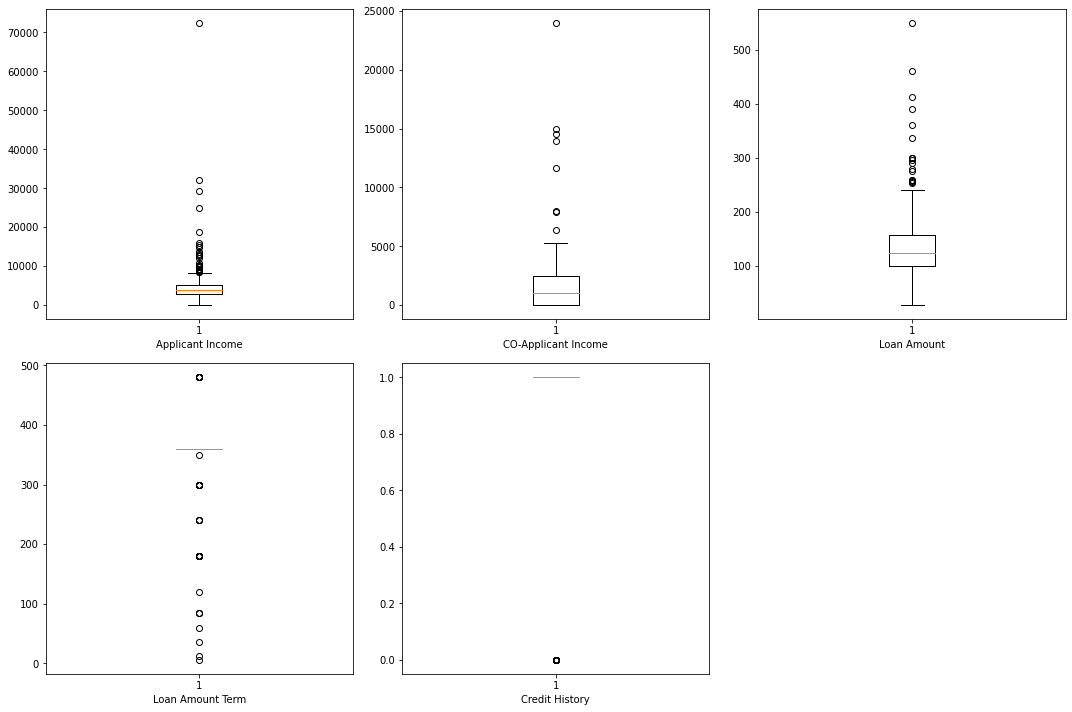

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.boxplot(df_test['ApplicantIncome'])
plt.xlabel('Applicant Income')

plt.subplot(2,3,2)
plt.boxplot(df_test['CoapplicantIncome'])
plt.xlabel('CO-Applicant Income')

plt.subplot(2,3,3)
plt.boxplot(df_test['LoanAmount'])
plt.xlabel('Loan Amount')

plt.subplot(2,3,4)
plt.boxplot(df_test['Loan_Amount_Term'])
plt.xlabel('Loan Amount Term')

plt.subplot(2,3,5)
plt.boxplot(df_test['Credit_History'])
plt.xlabel('Credit History')

plt.tight_layout()

#MinMax Scaling(Test Dataset)

In [ ]:
x=df_test.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area'],axis=1)

In [ ]:
z=df_test[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

     


In [ ]:
minmax= MinMaxScaler(feature_range=(0,1))
x1=minmax.fit_transform(x)

In [ ]:
#x1 is in array form converting back to DataFrame
x1=pd.DataFrame(x1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [ ]:
x1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.066258,0.065399,0.206860,0.710597,0.839237
std,0.067707,0.097260,0.116781,0.136410,0.367814
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039488,0.000000,0.139847,0.746835,1.000000
50%,0.052200,0.042708,0.185824,0.746835,1.000000
75%,0.069765,0.101271,0.248084,0.746835,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=pd.concat([x1,z],axis=1)

In [ ]:
dfz=df['Loan_ID']

In [ ]:

df.drop('Loan_ID',inplace=True,axis=1) 

#Encoding(Test Dataset)

In [ ]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
df['Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
df['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace = True)
       
 

In [ ]:
df = df.join(pd.get_dummies(df.Dependents,prefix='Dependents'))
df = df.join(pd.get_dummies(df.Property_Area, prefix='Property_Area'))
 

In [ ]:
df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,1.0,1,1,1,0,1,0,0,0,0,0,1
1,0.042411,0.062500,0.187739,0.746835,1.0,1,1,1,0,0,1,0,0,0,0,1
2,0.068938,0.075000,0.344828,0.746835,1.0,1,1,1,0,0,0,1,0,0,0,1
3,0.032263,0.106083,0.137931,0.746835,1.0,1,1,1,0,0,0,1,0,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1.0,1,0,0,0,1,0,0,0,0,0,1


#Predicting Loan status for testing data(minmax scaled)

In [ ]:
print('The Accuracy of Logistic Regression Model(on minmax scaled training data) is:',np.round(accuracy_score(y_test,y_pred_log_mimmax)*100,2),'%')#model validation checking using accuracy score
print('The Accuracy of KNN Model(on minmax  training scaled data) is:',np.round(accuracy_score(y_test,y_pred_knn_minmax)*100,2),'%')

print('The Accuracy of SVM Model(kernel=rbf)(on minmax scaled training data) is:',np.round(accuracy_score(y_test,y_pred_svm_minmax)*100,2),'%')
print('The Accuracy of Decision Tree Model(on minmax scaled training data) is:',np.round(accuracy_score(y_test,y_pred_deci_minmax)*100,2),'%')
print('The Accuracy of Random Forest Model (on min max scaled training data) is:',np.round(accuracy_score(y_test,y_pred_rand_minmax)*100,2),'%')

The Accuracy of Logistic Regression Model(on minmax scaled training data) is: 77.27 %
The Accuracy of KNN Model(on minmax  training scaled data) is: 72.73 %
The Accuracy of SVM Model(kernel=rbf)(on minmax scaled training data) is: 77.27 %
The Accuracy of Decision Tree Model(on minmax scaled training data) is: 64.94 %
The Accuracy of Random Forest Model (on min max scaled training data) is: 76.62 %


#From the above Results we can infer that Logistic Regression model and SVM(kernel=rbf) model has high accuracy (on minmax scaled training data)

###So for prediction Logistic Regression model or SVM model can be used

In [ ]:
df.head()#minmax scaled test dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,1.0,1,1,1,0,1,0,0,0,0,0,1
1,0.042411,0.062500,0.187739,0.746835,1.0,1,1,1,0,0,1,0,0,0,0,1
2,0.068938,0.075000,0.344828,0.746835,1.0,1,1,1,0,0,0,1,0,0,0,1
3,0.032263,0.106083,0.137931,0.746835,1.0,1,1,1,0,0,0,1,0,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1.0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.shape

(367, 16)

In [ ]:
y_pred_log_mimmax_test=model_logistic.predict(df)#loan status predictions on test data(minmax scaled)

In [ ]:
y_pred_log_mimmax_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
y_pred_log_mimmax_test=pd.DataFrame(y_pred_log_mimmax_test,columns=['Loan_Status'])#converting array into dataframe

In [ ]:
sub_minmax=pd.concat([dfz,y_pred_log_mimmax_test],axis=1)#concatinating Loan Id and Loan status

In [ ]:
sub_minmax['Loan_Status'].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [ ]:
#Dataframe to csv file conversion
sub_minmax.to_csv('SubmissionMinMaxFinal.csv',index=False)

In [ ]:
df11=pd.read_csv('SubmissionMinMaxFinal.csv')

In [ ]:
df11


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
df11.dtypes

Loan_ID        object
Loan_Status    object
dtype: object

#Standard Scaling(Test dataset)

In [ ]:
from sklearn.preprocessing import StandardScaler


      


In [ ]:
xs=df_test.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area'],axis=1)

In [ ]:
zs=df_test[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']]

In [ ]:
std= StandardScaler()
xs1=std.fit_transform(xs)

In [ ]:
#x1 is in array form converting back to DataFrame
xs1=pd.DataFrame(xs1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [ ]:
dfs=pd.concat([xs1,zs],axis=1)

In [ ]:
dfs.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.186461,-0.673335,-0.426780,0.266022,0.437674,LP001015,Male,Yes,0,Graduate,No,Urban
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674,LP001022,Male,Yes,1,Graduate,No,Urban
2,0.039641,0.098849,1.183033,0.266022,0.437674,LP001031,Male,Yes,2,Graduate,No,Urban
3,-0.502774,0.418877,-0.591047,0.266022,0.437674,LP001035,Male,Yes,2,Graduate,No,Urban
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674,LP001051,Male,No,0,Not Graduate,No,Urban


In [ ]:
dfsz=dfs['Loan_ID']

In [ ]:

dfs.drop('Loan_ID',inplace=True,axis=1) 

#Encoding(Test Data)

In [ ]:
dfs['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
dfs['Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
dfs['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
dfs['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace = True)
       
 

In [ ]:
dfs = dfs.join(pd.get_dummies(dfs.Dependents,prefix='Dependents'))
dfs = dfs.join(pd.get_dummies(dfs.Property_Area, prefix='Property_Area'))
 

In [ ]:
dfs.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [ ]:
dfs.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.426780,0.266022,0.437674,1,1,1,0,1,0,0,0,0,0,1
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674,1,1,1,0,0,1,0,0,0,0,1
2,0.039641,0.098849,1.183033,0.266022,0.437674,1,1,1,0,0,0,1,0,0,0,1
3,-0.502774,0.418877,-0.591047,0.266022,0.437674,1,1,1,0,0,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674,1,0,0,0,1,0,0,0,0,0,1


#Predicting Loan status for testing data(standard scaled)

In [ ]:
print('The Accuracy of Logistic Regression Model(on standard scaled  training data) is:',np.round(accuracy_score(y_test,y_pred_logistic_std)*100,2),'%')
#model validation checking using accuracy score
print('The Accuracy of KNN Model(on standard scaled training data) is:',np.round(accuracy_score(y_test,y_pred_knn_std)*100,2),'%')

print('The Accuracy of SVM Model(kernel=rbf)(on standard scaled training data) is:',np.round(accuracy_score(y_test,y_pred_svm_std)*100,2),'%')
print('The Accuracy of Decision Tree Model(on standard scaled training data) is:',np.round(accuracy_score(y_test,y_pred_deci_std)*100,2),'%')
print('The Accuracy of Random Forest Model(on standard scaled training data) is:',np.round(accuracy_score(y_test,y_pred_rand_std)*100,2),'%')

The Accuracy of Logistic Regression Model(on standard scaled  training data) is: 77.27 %
The Accuracy of KNN Model(on standard scaled training data) is: 78.57 %
The Accuracy of SVM Model(kernel=rbf)(on standard scaled training data) is: 78.57 %
The Accuracy of Decision Tree Model(on standard scaled training data) is: 64.94 %
The Accuracy of Random Forest Model(on standard scaled training data) is: 76.62 %


#From the above Results we can infer that KNN model and SVM(kernel=rbf) model has high accuracy (on standard scaled training data)

###So for prediction Logistic KNN model or SVM model can be used

In [ ]:
y_pred_svm_std_test=model_svm1.predict(dfs)#loan status predictions on test data(standard scaled)

In [ ]:
y_pred_svm_std_test=pd.DataFrame(y_pred_svm_std_test,columns=['Loan_Status'])#converting array into dataframe

In [ ]:
sub_std=pd.concat([dfsz,y_pred_svm_std_test],axis=1)#concatinating Loan Id and Loan status

In [ ]:
sub_std['Loan_Status'].value_counts()

Y    309
N     58
Name: Loan_Status, dtype: int64

In [ ]:
#Dataframe to csv file conversion
sub_std.to_csv('SubmissionStd1Final.csv',index=False)

In [186]:
from google.colab import files
files.upload()

Saving sample.csv to sample (1).csv


{'sample.csv': b'Loan_ID,Loan_Status\r\nLP001015,N\r\nLP001022,N\r\nLP001031,N\r\nLP001035,N\r\nLP001051,N\r\nLP001054,N\r\nLP001055,N\r\nLP001056,N\r\nLP001059,N\r\nLP001067,N\r\nLP001078,N\r\nLP001082,N\r\nLP001083,N\r\nLP001094,N\r\nLP001096,N\r\nLP001099,N\r\nLP001105,N\r\nLP001107,N\r\nLP001108,N\r\nLP001115,N\r\nLP001121,N\r\nLP001124,N\r\nLP001128,N\r\nLP001135,N\r\nLP001149,N\r\nLP001153,N\r\nLP001163,N\r\nLP001169,N\r\nLP001174,N\r\nLP001176,N\r\nLP001177,N\r\nLP001183,N\r\nLP001185,N\r\nLP001187,N\r\nLP001190,N\r\nLP001203,N\r\nLP001208,N\r\nLP001210,N\r\nLP001211,N\r\nLP001219,N\r\nLP001220,N\r\nLP001221,N\r\nLP001226,N\r\nLP001230,N\r\nLP001231,N\r\nLP001232,N\r\nLP001237,N\r\nLP001242,N\r\nLP001268,N\r\nLP001270,N\r\nLP001284,N\r\nLP001287,N\r\nLP001291,N\r\nLP001298,N\r\nLP001312,N\r\nLP001313,N\r\nLP001317,N\r\nLP001321,N\r\nLP001323,N\r\nLP001324,N\r\nLP001332,N\r\nLP001335,N\r\nLP001338,N\r\nLP001347,N\r\nLP001348,N\r\nLP001351,N\r\nLP001352,N\r\nLP001358,N\r\nLP001359

In [187]:
df_samplesubmission=pd.read_csv('sample.csv')

In [188]:
df_samplesubmission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [189]:
df_samplesubmission.dtypes

Loan_ID        object
Loan_Status    object
dtype: object

In [190]:
df11

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [202]:
df11.to_csv('Submission.csv',index=False)

In [204]:
df11=pd.read_csv('Submission.csv')